<a href="https://colab.research.google.com/github/RaihanFebrian01/PortofolioData/blob/main/TA_Dengan_MetodeLain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1qJkabnTQorCao6fGv30m-EFH6C5bCECi/edit?usp=sharing&ouid=108355656034658002761&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_data = pd.read_excel(path)

In [ ]:
df_data.head()

,rentangumur,sex,benjolan di kelopak mata,berair,berkabut,DM,ganjal,gatal,HD,HT,...,nyeri,penglihatan kabur,pusing,sakit,sekret,silau,terkena percikan api,terlalu lama mata melihat layar,tidak nyaman,Diagnosa
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,konjungtivitis
1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,konjungtivitis
2,2,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,konjungtivitis
3,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,konjungtivitis
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,konjungtivitis


In [ ]:
print(df_data.isnull().sum())

rentangumur                        0
sex                                0
benjolan di kelopak mata           0
berair                             0
berkabut                           0
DM                                 0
ganjal                             0
gatal                              0
HD                                 0
HT                                 0
kacamata tidak bisa dipakai        0
kelopak merah                      0
kering                             0
kontrol                            0
kotor                              0
mata kabur liat dekat              0
mata kemasukan benda asing         0
mata kemasukan gram                0
mata merah                         0
mata panas                         0
melihat bayangan hitam berjalan    0
nyeri                              0
penglihatan kabur                  0
pusing                             0
sakit                              0
sekret                             0
silau                              0
t

# **Nyoba ANN**

In [ ]:
from sklearn.model_selection import train_test_split

x = df_data.drop(columns = 'Diagnosa', axis = 1)
y = df_data['Diagnosa']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=60,stratify=y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [ ]:
x_train_scaled.shape

(188, 30)

In [ ]:
x_test_scaled.shape

(63, 30)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder


In [ ]:
y_train

199          corpus alineum
110              presbiopia
59     syndroma mata kering
25     syndroma mata kering
55     syndroma mata kering
               ...         
77               presbiopia
51     syndroma mata kering
12           konjungtivitis
247          katarak imatur
96               presbiopia
Name: Diagnosa, Length: 188, dtype: object

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
y_train_encoded

array([0, 4, 5, 5, 5, 1, 2, 4, 1, 0, 0, 1, 5, 2, 2, 5, 1, 2, 0, 5, 5, 1,
       0, 0, 3, 4, 4, 1, 3, 2, 2, 2, 1, 5, 1, 5, 2, 4, 1, 1, 1, 0, 1, 5,
       5, 4, 0, 3, 5, 5, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 5, 0, 5, 3, 4,
       4, 5, 2, 4, 0, 5, 4, 2, 4, 4, 2, 5, 1, 4, 5, 5, 2, 0, 1, 3, 4, 3,
       4, 4, 0, 1, 3, 2, 5, 3, 0, 2, 1, 1, 2, 1, 1, 4, 5, 3, 1, 0, 4, 1,
       2, 2, 0, 1, 4, 3, 1, 1, 4, 3, 5, 4, 3, 4, 1, 1, 4, 3, 5, 2, 4, 1,
       5, 4, 1, 5, 2, 5, 5, 3, 1, 1, 2, 1, 3, 1, 4, 4, 1, 2, 1, 4, 5, 5,
       1, 0, 1, 2, 1, 4, 5, 1, 5, 5, 0, 1, 1, 1, 5, 1, 5, 1, 2, 4, 5, 1,
       4, 3, 1, 5, 1, 1, 2, 4, 5, 3, 2, 4])

In [ ]:
model =Sequential()
model.add(Dense(30,activation= 'relu', input_dim=30))        #input layer
model.add(Dense(30, activation = 'relu'))                   #hidden layer
model.add(Dense(1, activation = 'sigmoid'))                #output layer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1891 (7.39 KB)
Trainable params: 1891 (7.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train_scaled, y_train_encoded, epochs=1000, batch_size=500, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 115ms/step - loss: -115534.5312 - accuracy: 0.2781 - val_loss: -116529.1172 - val_accuracy: 0.3158
Epoch 2/1000
1/1 [==============================] - 0s 65ms/step - loss: -115716.1875 - accuracy: 0.2781 - val_loss: -116708.4453 - val_accuracy: 0.3158
Epoch 3/1000
1/1 [==============================] - 0s 43ms/step - loss: -115897.2578 - accuracy: 0.2781 - val_loss: -116887.5547 - val_accuracy: 0.3158
Epoch 4/1000
1/1 [==============================] - 0s 54ms/step - loss: -116077.8125 - accuracy: 0.2781 - val_loss: -117066.5000 - val_accuracy: 0.3158
Epoch 5/1000
1/1 [==============================] - 0s 43ms/step - loss: -116257.9375 - accuracy: 0.2781 - val_loss: -117245.3125 - val_accuracy: 0.3158
Epoch 6/1000
1/1 [==============================] - 0s 58ms/step - loss: -116437.6797 - accuracy: 0.2781 - val_loss: -117424.0391 - val_accuracy: 0.3158
Epoch 7/1000
1/1 [==============================] - 0s 61ms/step - loss: -116617.

In [ ]:
y_log = model.predict(x_test_scaled)

2/2 [==============================] - 0s 5ms/step


In [ ]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test_encoded, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.27      1.00      0.42        17
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        13

    accuracy                           0.27        63
   macro avg       0.04      0.17      0.07        63
weighted avg       0.07      0.27      0.11        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Nyoba **SVM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
max_random_state = 1000  # Ganti dengan nilai maksimum yang sesuai
target_accuracy = 0.93
best_accuracy = 0.0
best_random_state = 0

In [ ]:
x = df_data.drop(columns = 'Diagnosa', axis = 1)
y = df_data['Diagnosa']

for i in range(1, max_random_state + 1):
  x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=i,stratify=y, test_size=0.2)
  sc = StandardScaler()
  X_train = sc.fit_transform(x_train)
  X_test = sc.transform(x_test)
  model = SVC(kernel='rbf', random_state=60)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy=accuracy_score(y_test, y_pred)
  print(f"Random State: {i}, Accuracy: {accuracy*100}")
  if accuracy >= target_accuracy:
        best_accuracy = accuracy
        best_random_state = i
        print(f"Akurasi mencapai target ({target_accuracy}) dengan random state {i}")
        break

Random State: 1, Accuracy: 86.27450980392157
Random State: 2, Accuracy: 76.47058823529412
Random State: 3, Accuracy: 82.35294117647058
Random State: 4, Accuracy: 78.43137254901961
Random State: 5, Accuracy: 84.31372549019608
Random State: 6, Accuracy: 80.3921568627451
Random State: 7, Accuracy: 90.19607843137256
Random State: 8, Accuracy: 84.31372549019608
Random State: 9, Accuracy: 82.35294117647058
Random State: 10, Accuracy: 72.54901960784314
Random State: 11, Accuracy: 80.3921568627451
Random State: 12, Accuracy: 78.43137254901961
Random State: 13, Accuracy: 86.27450980392157
Random State: 14, Accuracy: 90.19607843137256
Random State: 15, Accuracy: 82.35294117647058
Random State: 16, Accuracy: 76.47058823529412
Random State: 17, Accuracy: 76.47058823529412
Random State: 18, Accuracy: 78.43137254901961
Random State: 19, Accuracy: 88.23529411764706
Random State: 20, Accuracy: 86.27450980392157
Random State: 21, Accuracy: 84.31372549019608
Random State: 22, Accuracy: 86.27450980392157

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9411764705882353

Classification Report:
                       precision    recall  f1-score   support

      corpus alineum       1.00      0.80      0.89         5
           hordeolum       1.00      0.93      0.96        14
      katarak imatur       1.00      1.00      1.00         8
      konjungtivitis       0.80      0.80      0.80         5
          presbiopia       1.00      1.00      1.00         9
syndroma mata kering       0.83      1.00      0.91        10

            accuracy                           0.94        51
           macro avg       0.94      0.92      0.93        51
        weighted avg       0.95      0.94      0.94        51



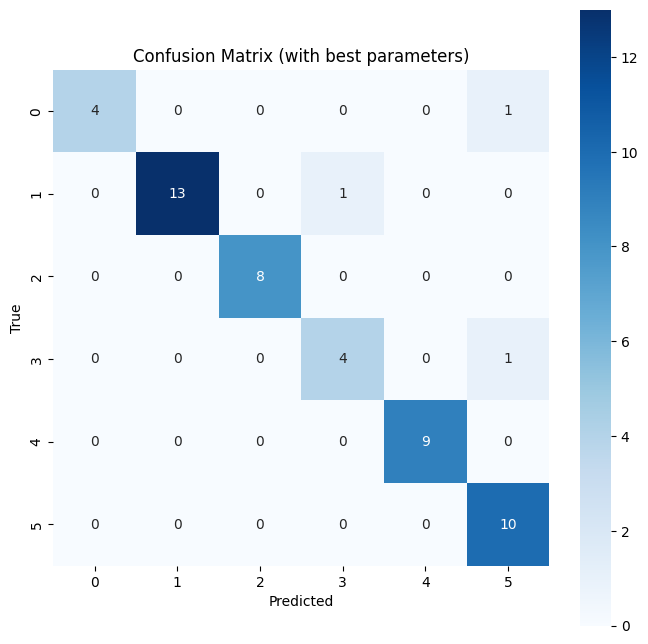

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix (with best parameters)")
plt.show()

# **Nyoba Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
max_random_state = 200  # Ganti dengan nilai maksimum yang sesuai
target_accuracy = 0.93
best_accuracy = 0.0
best_random_state = 0

In [ ]:
for i in range(1, max_random_state + 1):
  x = df_data.drop(columns = 'Diagnosa', axis = 1)
  y = df_data['Diagnosa']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
  model = RandomForestClassifier(n_estimators=300, random_state=i)  # Ganti parameter sesuai kebutuhan Anda
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred))
  if accuracy >= target_accuracy:
        best_accuracy = accuracy
        best_random_state = i
        print(f"Akurasi mencapai target ({target_accuracy}) dengan random state {i}")
        break

Accuracy: 0.8552631578947368
Accuracy: 0.8026315789473685
Accuracy: 0.868421052631579
Accuracy: 0.7763157894736842
Accuracy: 0.7631578947368421
Accuracy: 0.8421052631578947
Accuracy: 0.868421052631579
Accuracy: 0.8552631578947368
Accuracy: 0.8552631578947368
Accuracy: 0.8026315789473685
Accuracy: 0.7763157894736842
Accuracy: 0.7763157894736842
Accuracy: 0.7368421052631579
Accuracy: 0.8421052631578947
Accuracy: 0.8157894736842105
Accuracy: 0.7763157894736842
Accuracy: 0.9210526315789473
Accuracy: 0.8289473684210527
Accuracy: 0.7105263157894737
Accuracy: 0.7763157894736842
Accuracy: 0.75
Accuracy: 0.7763157894736842
Accuracy: 0.7894736842105263
Accuracy: 0.8289473684210527
Accuracy: 0.7105263157894737
Accuracy: 0.8552631578947368
Accuracy: 0.7763157894736842
Accuracy: 0.7105263157894737
Accuracy: 0.8289473684210527
Accuracy: 0.7894736842105263
Accuracy: 0.7763157894736842
Accuracy: 0.8157894736842105
Accuracy: 0.868421052631579
Accuracy: 0.7763157894736842
Accuracy: 0.8289473684210527
Ac

In [ ]:
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
                       precision    recall  f1-score   support

      corpus alineum       1.00      0.67      0.80         3
           hordeolum       0.93      1.00      0.97        14
      katarak imatur       1.00      0.82      0.90        11
      konjungtivitis       1.00      1.00      1.00         3
          presbiopia       1.00      0.93      0.97        15
syndroma mata kering       0.62      1.00      0.77         5

            accuracy                           0.92        51
           macro avg       0.93      0.90      0.90        51
        weighted avg       0.94      0.92      0.92        51



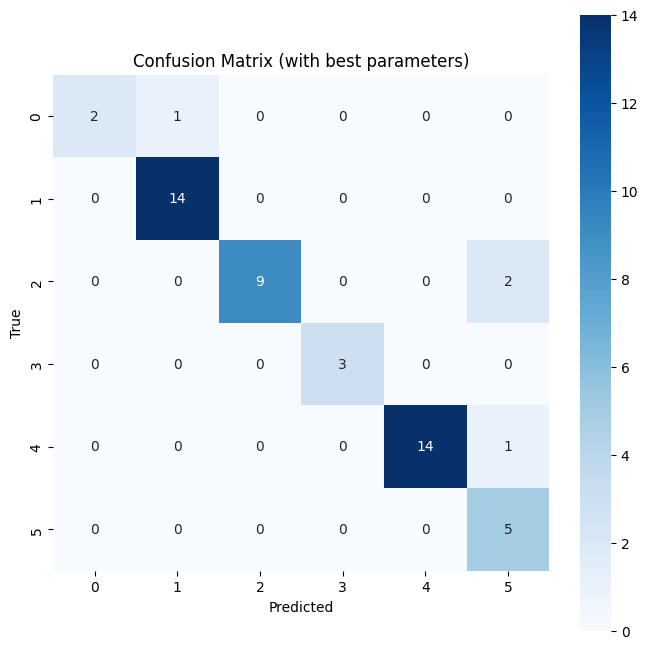

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix (with best parameters)")
plt.show()